In [1]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import os
import numpy as np


os.chdir("/home/sambray/Documents/MS_analysis_samsplaying/")
from Style.style_guide import animal_style
from Task_event.ms_task_performance import AlternationTaskPerformance

import matplotlib.pyplot as plt


def survival_curve(repeat_count):
    x = np.arange(1, 10)
    y = np.array([np.sum(repeat_count >= xx) / len(repeat_count) for xx in x])
    return y


def abundance_hist(repeat_count):
    x = np.arange(1, 20)
    y = np.array([np.sum(repeat_count == xx) / len(repeat_count) for xx in x])  # * x
    return y


def get_repeat_counts(nwb_file_name, epochs):
    repeat_count = []
    for epoch in epochs:
        key = {"nwb_file_name": nwb_file_name, "epoch": epoch}
        if not AlternationTaskPerformance() & key:
            continue
        visits = (AlternationTaskPerformance() & key).fetch1("current_wells")
        outbound_ind = np.where(visits[:-1] == "center_well")[0] + 1
        outbound_loc = visits[outbound_ind]
        switch_outbound_count = np.where(outbound_loc[:-1] != outbound_loc[1:])[0]
        switch_outbound_count = np.append([-1], switch_outbound_count)
        repeat_count.extend(np.diff(switch_outbound_count))
    return repeat_count


def get_trial_counts(nwb_file_name, epochs):
    trial_count = 0
    for epoch in epochs:
        key = {"nwb_file_name": nwb_file_name, "epoch": epoch}
        if not AlternationTaskPerformance() & key:
            continue
        visits = (AlternationTaskPerformance() & key).fetch1("current_wells")
        outbound_ind = np.where(visits[:-1] == "center_well")[0] + 1
        trial_count += len(outbound_ind)
    return trial_count


# def get_repeat_counts(nwb_file_name,epochs):
#     repeat_count = []
#     for epoch in epochs:
#         key = {"nwb_file_name":nwb_file_name,"epoch":epoch}
#         if not AlternationTaskPerformance() & key:
#             continue
#         visits = (AlternationTaskPerformance() & key).fetch1('current_wells')
#         outbound_ind = np.where([not 'center_well' in visit for visit in visits])[0]
#         outbound_loc = visits[outbound_ind]
#         switch_outbound_count = np.where(outbound_loc[:-1]!=outbound_loc[1:])[0]
#         switch_outbound_count = np.append([-1],switch_outbound_count)
#         repeat_count.extend(np.diff(switch_outbound_count))
#     return repeat_count

[2024-12-17 11:33:19,354][INFO]: Connecting sambray@lmf-db.cin.ucsf.edu:3306
[2024-12-17 11:33:19,390][INFO]: Connected sambray@lmf-db.cin.ucsf.edu:3306


# Survival Curves

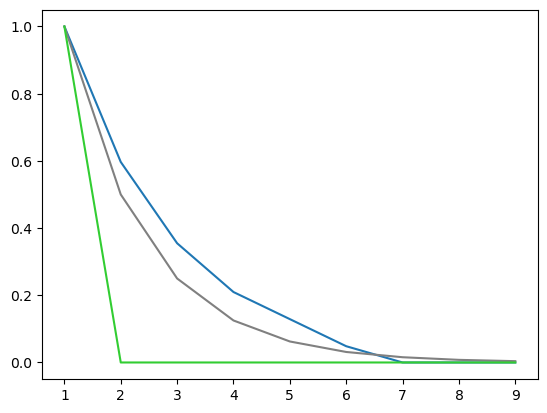

In [ ]:
nwb_file_name = "Banner20220224_.nwb"
epochs = np.arange(10, 20)


repeat_count = get_repeat_counts(nwb_file_name, epochs)
survival = survival_curve(repeat_count)
plt.plot(np.arange(1, 1 + survival.size), survival)


# Plot the null hypothesis
x_chance = np.arange(1, 10)
survival_chance = 0.5 ** (x_chance - 1)
plt.plot(x_chance, survival_chance, c="grey")

survival_learned = np.zeros_like(x_chance)
survival_learned[0] = 1
plt.plot(x_chance, survival_learned, c="limegreen")

# Frequency plots

Text(0, 0.5, 'Proportion of switches')

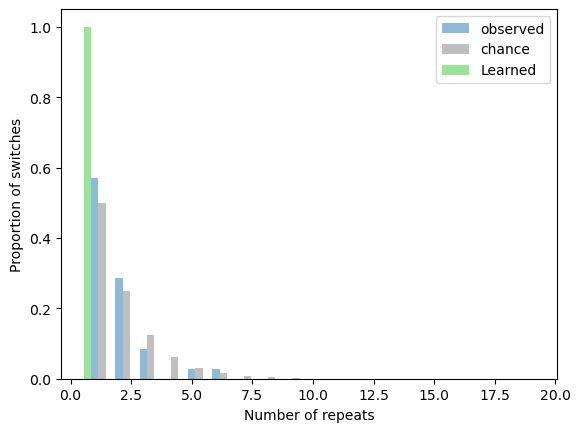

In [ ]:
nwb_file_name = "Banner20220224_.nwb"
epochs = np.arange(10)

width = 0.3
repeat_count = get_repeat_counts(nwb_file_name, epochs)
survival = abundance_hist(repeat_count)
# plt.plot(np.arange(1,1+survival.size),survival)
plt.bar(
    np.arange(1, 1 + survival.size), survival, alpha=0.5, width=width, label="observed"
)


# Plot the null hypotheses
x_chance = np.arange(1, 10)
survival_chance = 0.5 ** (x_chance)
plt.bar(
    x_chance + width,
    survival_chance,
    alpha=0.5,
    facecolor="grey",
    width=width,
    label="chance",
)


plt.bar(
    [1 - width], [1], alpha=0.5, facecolor="limegreen", width=width, label="Learned"
)

plt.legend()
plt.xlabel("Number of repeats")
plt.ylabel("Proportion of switches")

# All animals, first day

Text(0, 0.5, 'Proportion of switches')

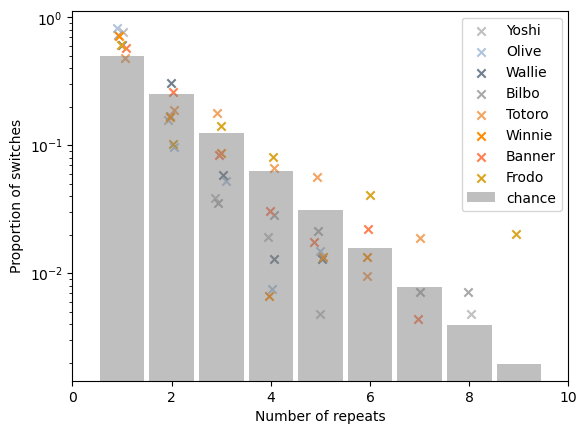

In [3]:
nwb_file_names_map = {
    "Yoshi": [
        "Yoshi20220517_.nwb",
        "Yoshi20220518_.nwb",
    ],
    "Olive": ["Olive20220711_.nwb"],
    "Wallie": ["Wallie20220922_.nwb"],
    "Bilbo": ["Bilbo20230802_.nwb", "Bilbo20230804_.nwb"],  # no entrainment
    "Totoro": ["Totoro20220613_.nwb", "Totoro20220614_.nwb"],
    "Winnie": ["Winnie20220719_.nwb", "Winnie20220720_.nwb"],
    "Banner": ["Banner20220224_.nwb", "Banner20220225_.nwb"],
    "Frodo": [
        "Frodo20230814_.nwb",
    ],  # "Frodo20230815_.nwb","Frodo20230816_.nwb",]
}


epochs = np.arange(0, 15)
for animal in nwb_file_names_map.keys():
    repeat_count = []
    total_epoch_count = 0
    for nwb_file_name in nwb_file_names_map[animal]:
        # for nwb_file_name in [nwb_file_names_map[animal][0]]:
        day_epochs = np.max(
            (AlternationTaskPerformance & {"nwb_file_name": nwb_file_name}).fetch(
                "epoch"
            )
        )
        sample_epochs = epochs - total_epoch_count
        sample_epochs = sample_epochs[sample_epochs >= 0]
        repeat_count.extend(get_repeat_counts(nwb_file_name, epochs))
        total_epoch_count += day_epochs

    survival = abundance_hist(repeat_count)
    plt.scatter(
        np.arange(1, 1 + survival.size) + np.random.normal(0, 0.05, survival.size),
        survival,
        label=animal,
        marker="x",
        color=animal_style.loc[animal]["color"],
    )

x_chance = np.arange(1, 10)
survival_chance = 0.5 ** (x_chance)
plt.bar(
    x_chance, survival_chance, alpha=0.5, facecolor="grey", width=0.9, label="chance"
)
plt.legend()
plt.xlim(0, 10)
plt.yscale("log")

plt.xlabel("Number of repeats")
plt.ylabel("Proportion of switches")

/tmp/ipykernel_3961104/3802515137.py:18: RuntimeWarning: invalid value encountered in scalar divide
  y = np.array([np.sum(repeat_count==xx)/len(repeat_count) for xx in x]) #* x
/tmp/ipykernel_3961104/3802515137.py:18: RuntimeWarning: invalid value encountered in scalar divide
  y = np.array([np.sum(repeat_count==xx)/len(repeat_count) for xx in x]) #* x
/tmp/ipykernel_3961104/3802515137.py:18: RuntimeWarning: invalid value encountered in scalar divide
  y = np.array([np.sum(repeat_count==xx)/len(repeat_count) for xx in x]) #* x
/tmp/ipykernel_3961104/3802515137.py:18: RuntimeWarning: invalid value encountered in scalar divide
  y = np.array([np.sum(repeat_count==xx)/len(repeat_count) for xx in x]) #* x
/tmp/ipykernel_3961104/3802515137.py:18: RuntimeWarning: invalid value encountered in scalar divide
  y = np.array([np.sum(repeat_count==xx)/len(repeat_count) for xx in x]) #* x
/tmp/ipykernel_3961104/3802515137.py:18: RuntimeWarning: invalid value encountered in scalar divide
  y = np.a

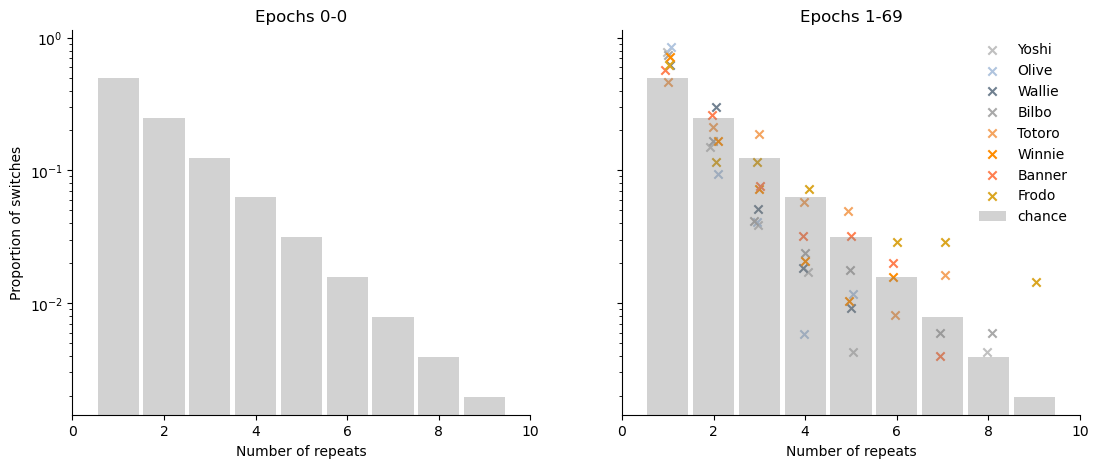

In [ ]:
from Style.style_guide import animal_style, transfection_style

nwb_file_names_map = {
    "Yoshi": [
        "Yoshi20220517_.nwb",
        "Yoshi20220518_.nwb",
    ],
    "Olive": ["Olive20220711_.nwb"],
    "Wallie": ["Wallie20220922_.nwb"],
    "Bilbo": ["Bilbo20230802_.nwb", "Bilbo20230804_.nwb"],  # no entrainment
    "Totoro": ["Totoro20220613_.nwb", "Totoro20220614_.nwb"],
    "Winnie": ["Winnie20220719_.nwb", "Winnie20220720_.nwb"],
    "Banner": ["Banner20220224_.nwb", "Banner20220225_.nwb"],
    "Frodo": [
        "Frodo20230814_.nwb",
    ],  # "Frodo20230815_.nwb","Frodo20230816_.nwb",]
}
split = 1
epochs_list = [np.arange(0, split), np.arange(split, 70)]

fig, ax_list = plt.subplots(ncols=2, figsize=(13, 5), sharey=True)

pooled_results = [
    {"transfected": np.zeros(19), "control": np.zeros(19)} for i in range(2)
]
trial_counts = [{"transfected": 0, "control": 0} for _ in range(2)]

animal_results = [
    {animal: np.zeros(19) for animal in nwb_file_names_map.keys()} for i in range(2)
]
animal_trial_counts = [
    {animal: 0 for animal in nwb_file_names_map.keys()} for i in range(2)
]


for i, (epochs, ax) in enumerate(zip(epochs_list, ax_list)):
    # for i,(epochs,ax) in enumerate(zip([np.arange(0,5),np.arange(15,50)],ax_list)):
    for j, animal in enumerate(nwb_file_names_map.keys()):
        color = animal_style.loc[animal]["color"]
        repeat_count = []
        total_epoch_count = 0
        animal_trial_count = 0
        for nwb_file_name in nwb_file_names_map[animal]:
            # for nwb_file_name in [nwb_file_names_map[animal][0]]:
            day_epochs = np.max(
                (AlternationTaskPerformance & {"nwb_file_name": nwb_file_name}).fetch(
                    "epoch"
                )
            )
            sample_epochs = epochs - total_epoch_count
            sample_epochs = sample_epochs[sample_epochs >= 0]
            repeat_count.extend(get_repeat_counts(nwb_file_name, epochs))

            total_epoch_count += day_epochs
            animal_trial_count += get_trial_counts(nwb_file_name, epochs)

        survival = abundance_hist(repeat_count)
        ax.scatter(
            np.arange(1, 1 + survival.size) + np.random.normal(0, 0.05, survival.size),
            survival,
            label=animal,
            marker="x",
            color=color,
        )

        if animal_style.loc[animal]["background"] == transfection_style["transfected"]:
            pooled_results[i]["transfected"] += survival
            trial_counts[i]["transfected"] += animal_trial_count
        else:
            pooled_results[i]["control"] += survival
            trial_counts[i]["control"] += animal_trial_count

        animal_results[i][animal] += survival
        animal_trial_counts[i][animal] += animal_trial_count

    x_chance = np.arange(1, 10)
    survival_chance = 0.5 ** (x_chance)  # * x_chance
    ax.bar(
        x_chance,
        survival_chance,
        alpha=0.35,
        facecolor="grey",
        width=0.9,
        label="chance",
    )
    ax.set_xlim(0, 10)
    ax.set_yscale("log")
    ax.set_xlabel("Number of repeats")
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_title(f"Epochs {epochs[0]}-{epochs[-1]}")
ax_list[0].set_ylabel("Proportion of switches")
ax_list[1].legend(frameon=False)
plt.rcParams["svg.fonttype"] = "none"
# plt.savefig('./Plots/fens_2024/behavior_repeats.svg',format='svg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]
[0.25165593 0.07405887 0.03108179 0.01478116 0.00403154 0.00403154
 0.00255225        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]


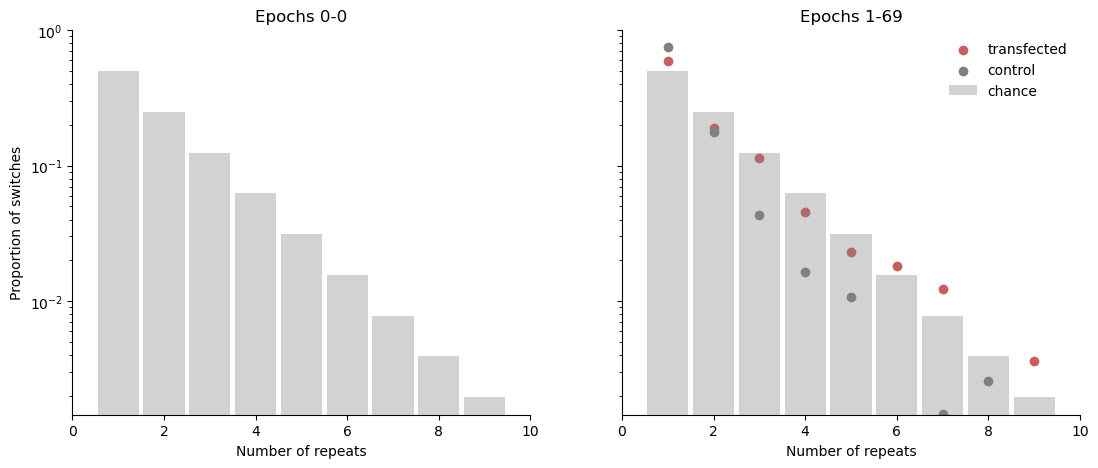

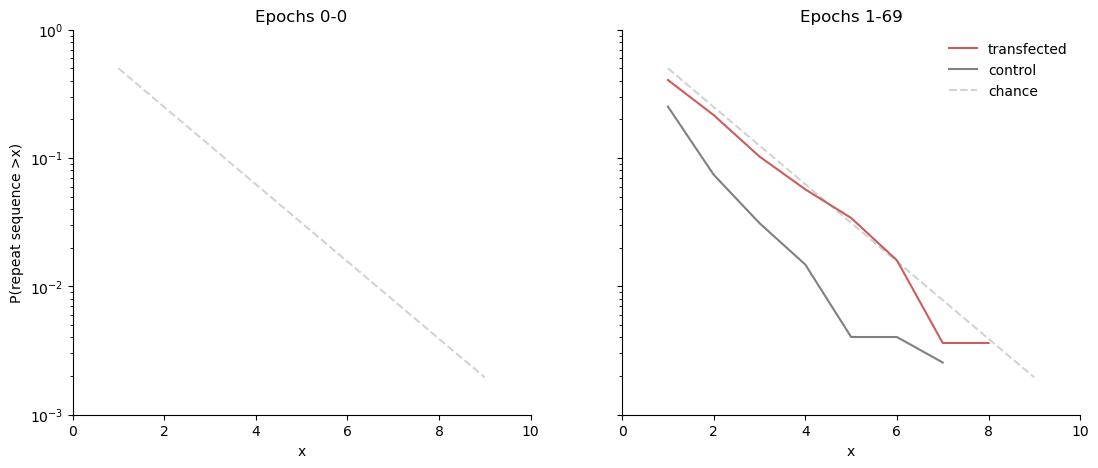

In [ ]:
fig, ax_list = plt.subplots(ncols=2, figsize=(13, 5), sharey=True)
for i, ax in enumerate(ax_list):
    val = pooled_results[i]["transfected"]
    val = val / np.sum(val)
    ax.scatter(
        np.arange(1, 20),
        val,
        color=transfection_style["transfected"],
        label="transfected",
    )
    val = pooled_results[i]["control"]
    val = val / np.sum(val)
    ax.scatter(
        np.arange(1, 20), val, color=transfection_style["control"], label="control"
    )
    ax.set_yscale("log")

    x_chance = np.arange(1, 10)
    survival_chance = 0.5 ** (x_chance)  # * x_chance
    ax.bar(
        x_chance,
        survival_chance,
        alpha=0.35,
        facecolor="grey",
        width=0.9,
        label="chance",
    )
    ax.set_xlabel("Number of repeats")
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_title(f"Epochs {epochs_list[i][0]}-{epochs_list[i][-1]}")
    ax_list[0].set_ylabel("Proportion of switches")
    ax_list[1].legend(frameon=False)
    plt.rcParams["svg.fonttype"] = "none"

    ax.set_xlim(0, 10)

plt.rcParams["svg.fonttype"] = "none"
fig.savefig("./Plots/fens_2024/behavior_repeats_pooled.svg", format="svg")
fig, ax_list = plt.subplots(ncols=2, figsize=(13, 5), sharey=True)
for i, ax in enumerate(ax_list):
    val = pooled_results[i]["transfected"]
    val = val / np.sum(val)
    val = 1 - np.cumsum(val)
    val[val < 1e-10] = np.nan
    ax.plot(
        np.arange(1, 20),
        val,
        color=transfection_style["transfected"],
        label="transfected",
    )
    val = pooled_results[i]["control"]
    val = val / np.sum(val)
    val = 1 - np.cumsum(val)
    val[val < 1e-10] = np.nan
    ax.plot(np.arange(1, 20), val, color=transfection_style["control"], label="control")
    ax.set_yscale("log")
    print(val)

    x_chance = np.arange(1, 10)
    survival_chance = 0.5 ** (x_chance)  # * x_chance
    survival_chance = 1 - np.cumsum(survival_chance)
    ax.plot(
        x_chance,
        survival_chance,
        alpha=0.35,
        color="grey",
        # width=0.9,
        label="chance",
        ls="--",
    )
    ax.set_xlabel("x")
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_title(f"Epochs {epochs_list[i][0]}-{epochs_list[i][-1]}")
    ax_list[0].set_ylabel("P(repeat sequence >x)")
    ax_list[1].legend(frameon=False)
    plt.rcParams["svg.fonttype"] = "none"

    ax.set_xlim(0, 10)

ax.set_ylim(1e-3, 1)
plt.rcParams["svg.fonttype"] = "none"
# fig.savefig('./Plots/fens_2024/behavior_survival_curve_pooled.svg',format='svg')

''

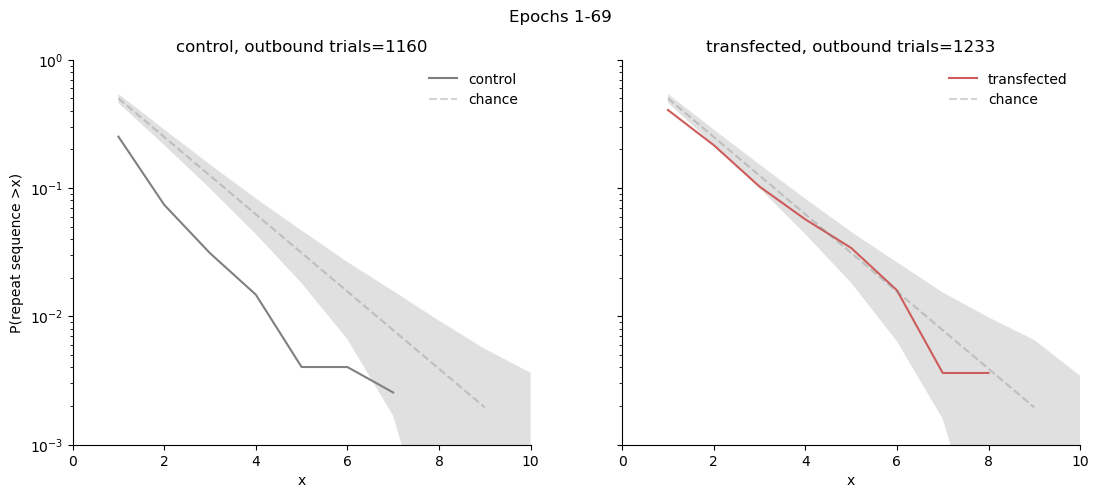

In [ ]:
def bootstrap_chance_dist(n_trials, n_bootstraps):
    chance_dist = []
    for i in range(n_bootstraps):
        outbound_loc = np.random.binomial(1, 0.5, n_trials)
        switch_outbound_count = np.where(outbound_loc[:-1] != outbound_loc[1:])[0]
        switch_outbound_count = np.append([-1], switch_outbound_count)
        repeat_count = np.diff(switch_outbound_count)
        chance_dist.append(abundance_hist(repeat_count))

    return np.array(chance_dist)


n_bootstraps = int(1e4)
""""""
fig, ax_list = plt.subplots(ncols=2, figsize=(13, 5), sharey=True)
for i, (ax, cond) in enumerate(
    zip(
        ax_list,
        [
            "control",
            "transfected",
        ],
    )
):
    val = pooled_results[1][cond]
    val = val / np.sum(val)
    val = 1 - np.cumsum(val)
    val[val < 1e-10] = np.nan
    ax.plot(np.arange(1, 20), val, color=transfection_style[cond], label=cond)
    ax.set_yscale("log")
    # print(val)

    x_chance = np.arange(1, 10)
    survival_chance = 0.5 ** (x_chance)  # * x_chance
    survival_chance = 1 - np.cumsum(survival_chance)
    ax.plot(
        x_chance,
        survival_chance,
        alpha=0.35,
        color="grey",
        # width=0.9,
        label="chance",
        ls="--",
    )
    n_trials = trial_counts[1][cond]
    chance_dist = bootstrap_chance_dist(n_trials, n_bootstraps)
    chance_dist = np.array([1 - np.cumsum(x)[:10] for x in chance_dist])

    xx = np.arange(1, 11)
    # plt.plot(xx,np.mean(chance_dist,axis=0))
    lo = np.percentile(chance_dist, 2.5, axis=0)
    hi = np.percentile(chance_dist, 97.5, axis=0)
    lo = np.clip(lo, 1e-4, 1)
    hi = np.clip(hi, 1e-4, 1)
    ax.fill_between(xx, lo, hi, alpha=0.7, facecolor="lightgrey")
    ax.set_yscale("log")

    ax.set_xlabel("x")
    ax.spines[["top", "right"]].set_visible(False)

    ax_list[0].set_ylabel("P(repeat sequence >x)")
    ax.legend(frameon=False)
    # plt.rcParams['svg.fonttype'] = 'none'

    ax.set_xlim(0, 10)
    ax.set_title(f"{cond}, outbound trials={n_trials}")


ax.set_ylim(1e-3, 1)
fig.suptitle(f"Epochs {epochs_list[1][0]}-{epochs_list[1][-1]}")
""""""

In [ ]:
plt.rcParams["svg.fonttype"] = "none"
# fig.savefig('./Plots/fens_2024/behavior_survival_curve_pooled_bootstrap.svg',format='svg')
fig.savefig(
    "./Figures_20241201/behavior_outbound_repeat_survival_curve_pooled_bootstrap.svg"
)

### individual animal repeat count survival curve

''

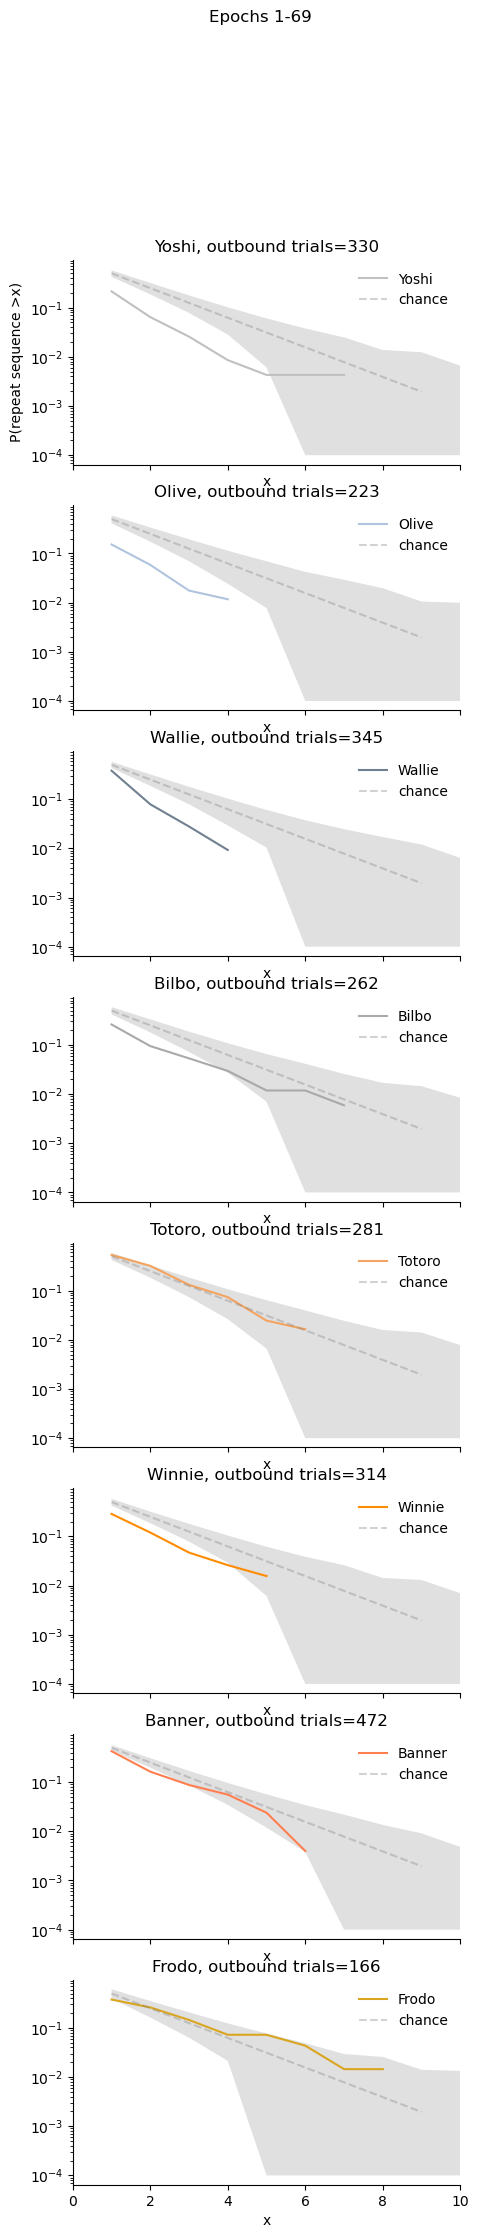

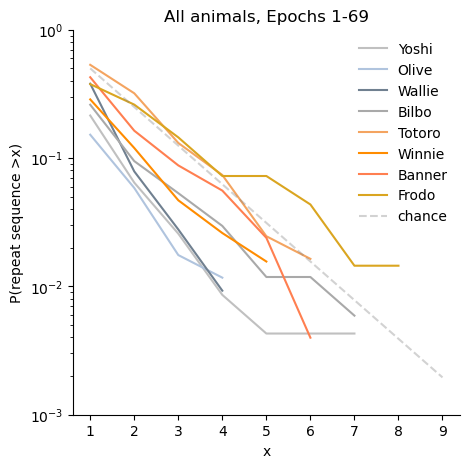

In [ ]:
def bootstrap_chance_dist(n_trials, n_bootstraps):
    chance_dist = []
    for i in range(n_bootstraps):
        outbound_loc = np.random.binomial(1, 0.5, n_trials)
        switch_outbound_count = np.where(outbound_loc[:-1] != outbound_loc[1:])[0]
        switch_outbound_count = np.append([-1], switch_outbound_count)
        repeat_count = np.diff(switch_outbound_count)
        chance_dist.append(abundance_hist(repeat_count))

    return np.array(chance_dist)


n_bootstraps = int(1e4)
""""""
fig, ax_list = plt.subplots(
    nrows=len(animal_results[0].keys()), figsize=(5, 25), sharey=True, sharex=True
)
fig_all = plt.figure(figsize=(5, 5))
ax_all = fig_all.add_subplot(111)
analysis_set = 1  # early opr late
for i, (ax, cond) in enumerate(zip(ax_list, animal_results[0].keys())):
    val = animal_results[analysis_set][cond]
    val = val / np.sum(val)
    val = 1 - np.cumsum(val)
    val[val < 1e-10] = np.nan
    ax.plot(np.arange(1, 20), val, color=animal_style.loc[cond, "color"], label=cond)
    ax_all.plot(
        np.arange(1, 20), val, color=animal_style.loc[cond, "color"], label=cond
    )
    ax.set_yscale("log")
    # print(val)

    x_chance = np.arange(1, 10)
    survival_chance = 0.5 ** (x_chance)  # * x_chance
    survival_chance = 1 - np.cumsum(survival_chance)
    ax.plot(
        x_chance,
        survival_chance,
        alpha=0.35,
        color="grey",
        # width=0.9,
        label="chance",
        ls="--",
    )

    n_trials = animal_trial_counts[1][cond]
    chance_dist = bootstrap_chance_dist(n_trials, n_bootstraps)
    chance_dist = np.array([1 - np.cumsum(x)[:10] for x in chance_dist])

    xx = np.arange(1, 11)
    # plt.plot(xx,np.mean(chance_dist,axis=0))
    lo = np.percentile(chance_dist, 2.5, axis=0)
    hi = np.percentile(chance_dist, 97.5, axis=0)
    lo = np.clip(lo, 1e-4, 1)
    hi = np.clip(hi, 1e-4, 1)
    ax.fill_between(xx, lo, hi, alpha=0.7, facecolor="lightgrey")
    ax.set_yscale("log")

    ax.set_xlabel("x")
    ax.spines[["top", "right"]].set_visible(False)

    ax_list[0].set_ylabel("P(repeat sequence >x)")
    ax.legend(frameon=False)
    # plt.rcParams['svg.fonttype'] = 'none'

    ax.set_xlim(0, 10)
    ax.set_title(f"{cond}, outbound trials={n_trials}")

ax_all.set_ylim(1e-3, 1)
ax_all.set_yscale("log")
ax_all.set_ylim(1e-3, 1)
ax_all.set_xlabel("x")
ax_all.spines[["top", "right"]].set_visible(False)
ax_all.set_ylabel("P(repeat sequence >x)")
x_chance = np.arange(1, 10)
survival_chance = 0.5 ** (x_chance)  # * x_chance
survival_chance = 1 - np.cumsum(survival_chance)
ax_all.plot(
    x_chance,
    survival_chance,
    alpha=0.35,
    color="grey",
    # width=0.9,
    label="chance",
    ls="--",
)
ax_all.legend(frameon=False)
ax_all.set_title(
    f"All animals, Epochs {epochs_list[analysis_set][0]}-{epochs_list[analysis_set][-1]}"
)

fig.suptitle(f"Epochs {epochs_list[analysis_set][0]}-{epochs_list[analysis_set][-1]}")
""""""

In [ ]:
plt.rcParams["svg.fonttype"] = "none"
# fig.savefig('./Plots/fens_2024/behavior_survival_curve_pooled_bootstrap.svg',format='svg')
fig.savefig(
    "./Figures_20241201/behavior_outbound_repeat_survival_curve_individual_bootstrap.svg"
)
fig_all.savefig(
    "./Figures_20241201/behavior_outbound_repeat_survival_curve_individual_combined.svg"
)

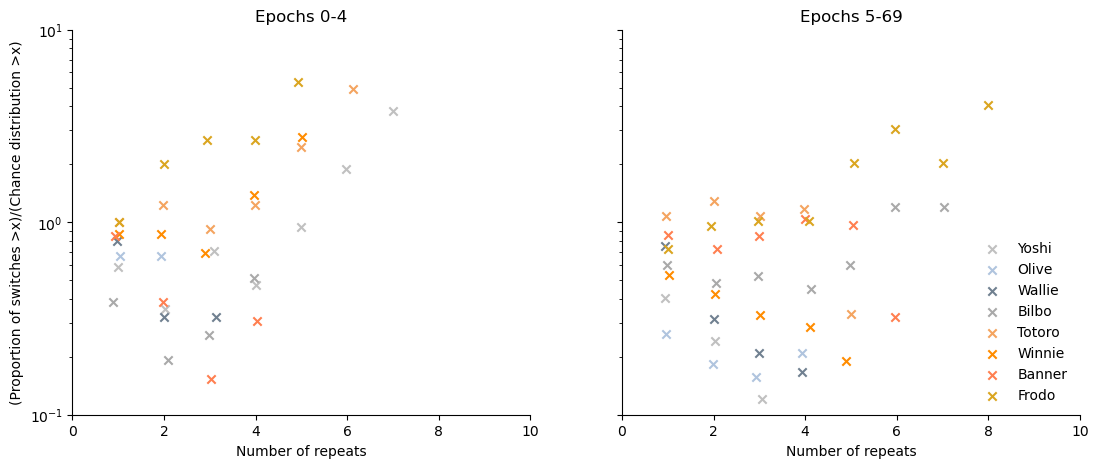

In [ ]:
nwb_file_names_map = {
    "Yoshi": [
        "Yoshi20220517_.nwb",
        "Yoshi20220518_.nwb",
    ],
    "Olive": ["Olive20220711_.nwb"],
    "Wallie": ["Wallie20220922_.nwb"],
    "Bilbo": ["Bilbo20230802_.nwb", "Bilbo20230804_.nwb"],  # no entrainment
    "Totoro": ["Totoro20220613_.nwb", "Totoro20220614_.nwb"],
    "Winnie": ["Winnie20220719_.nwb", "Winnie20220720_.nwb"],
    "Banner": ["Banner20220224_.nwb", "Banner20220225_.nwb"],
    "Frodo": [
        "Frodo20230814_.nwb",
    ],  # "Frodo20230815_.nwb","Frodo20230816_.nwb",]
}


fig, ax_list = plt.subplots(ncols=2, figsize=(13, 5), sharey=True)
split = 5
x_chance = np.arange(1, 20)
survival_chance = 0.5 ** (x_chance)
survival_chance = 1 - np.cumsum(survival_chance)

for i, (epochs, ax) in enumerate(
    zip([np.arange(0, split), np.arange(split, 70)], ax_list)
):
    # for i,(epochs,ax) in enumerate(zip([np.arange(0,5),np.arange(15,50)],ax_list)):
    for j, animal in enumerate(nwb_file_names_map.keys()):
        color = animal_style.loc[animal]["color"]
        repeat_count = []
        total_epoch_count = 0
        for nwb_file_name in nwb_file_names_map[animal]:
            # for nwb_file_name in [nwb_file_names_map[animal][0]]:
            day_epochs = np.max(
                (AlternationTaskPerformance & {"nwb_file_name": nwb_file_name}).fetch(
                    "epoch"
                )
            )
            sample_epochs = epochs - total_epoch_count
            sample_epochs = sample_epochs[sample_epochs >= 0]
            repeat_count.extend(get_repeat_counts(nwb_file_name, epochs))
            total_epoch_count += day_epochs

        survival = abundance_hist(repeat_count)
        survival = 1 - np.cumsum(survival)
        survival = survival / survival_chance
        survival[survival == 0] = np.nan
        ax.scatter(
            np.arange(1, 1 + survival.size) + np.random.normal(0, 0.05, survival.size),
            survival,
            label=animal,
            marker="x",
            color=color,
        )
        # ax.plot(
        #     np.arange(1, 1 + survival.size) + np.random.normal(0, 0.05, survival.size),
        #     survival,
        #     label=animal,
        #     # marker="x",
        #     color=color,
        # )

    # * x_chance
    # ax.bar(
    #     x_chance,
    #     survival_chance,
    #     alpha=0.35,
    #     facecolor="grey",
    #     width=0.9,
    #     label="chance",
    # )
    ax.set_xlim(0, 10)
    ax.set_yscale("log")
    ax.set_xlabel("Number of repeats")
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_title(f"Epochs {epochs[0]}-{epochs[-1]}")

ax_list[0].set_ylim(0.1, 10)
ax_list[0].set_ylabel("(Proportion of switches >x)/(Chance distribution >x)")
ax_list[1].legend(frameon=False)
plt.rcParams["svg.fonttype"] = "none"
# plt.savefig('./Plots/fens_2024/behavior_repeats.svg',format='svg')

In [9]:
survival_chance.shape
survival.shape

(19,)